In [516]:
from sklearn.linear_model import LinearRegression
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

scenario = "sensitivity_01"

In [517]:
sns.set_theme(style="whitegrid")
#path_to_results = os.path.join(os.path.dirname(os.path.dirname(os.getcwd()) ), "amiris_workflow", "2050example")
path_to_results = os.path.join(os.path.dirname(os.path.dirname(os.getcwd()) ), "amiris_workflow" )
path_to_structure = os.path.join(path_to_results, "amiris_data_structure.xlsx")
path_to_load = os.path.join(path_to_results, "amiris-config", "data","load.csv")
path_to_output = os.path.join(path_to_results, "output","amiris_results.csv" )
path_to_storage_levels = os.path.join(path_to_results, "output","final_storage_levels.csv" )
path_to_generation = os.path.join(path_to_results, "output","hourly_generation_per_group.csv" )
path_to_electricity_prices = os.path.join(path_to_results, "output","raw","EnergyExchangeMulti.csv" )

path_to_plots = os.path.join(os.getcwd(),  "Scenarios", "AMIRIS", scenario )
if not os.path.exists(path_to_plots):
    os.makedirs(path_to_plots)
#-----------------------------------------------------------------------------
elec_prices_data = pd.read_csv(path_to_electricity_prices, sep=";")  
generation_data =  pd.read_csv(path_to_generation, index_col="Unnamed: 0")
load_data = pd.read_csv(path_to_load, sep=";", header=None) 
results_data = pd.read_csv(path_to_output) 
storage_levels_data = pd.read_csv(path_to_storage_levels) 
storages_data = pd.read_excel(path_to_structure, sheet_name='storages', index_col=0)
conventionals_data = pd.read_excel(path_to_structure, sheet_name='conventionals', index_col=0)
renewables_data = pd.read_excel(path_to_structure, sheet_name='renewables', index_col=0)
electrolysers_data = pd.read_excel(path_to_structure, sheet_name='electrolysers', index_col=0)
biogas_data = pd.read_excel(path_to_structure, sheet_name='biogas', index_col=0)
# Why is the electrolysis_hydrogen_generation given in the load generation? I think that value is not needed. 

In [518]:
print("Conventionals " + str(conventionals_data["InstalledPowerInMW"].sum()/1000))
print("Renewables " + str(renewables_data["InstalledPowerInMW"].sum()/1000))
print("electrolysers " + str(electrolysers_data["PeakConsumptionInMW"].sum()/1000))
print("biogas " + str(biogas_data["InstalledPowerInMW"].sum()/1000))


Conventionals 12.378
Renewables 115.327
electrolysers 41.071
biogas 0.0


In [519]:

windon = renewables_data[renewables_data["Set"] =="WindOn"]
print(windon["InstalledPowerInMW"].sum())
windoff = renewables_data[renewables_data["Set"] =="WindOff"]
print(windoff["InstalledPowerInMW"].sum())
PV = renewables_data[renewables_data["Set"] =="OtherPV"]
print(PV["InstalledPowerInMW"].sum())
ROR = renewables_data[renewables_data["Set"] =="RunOfRiver"]
print(ROR["InstalledPowerInMW"].sum())

12001
70001
33284
41


In [520]:
windon_join = pd.merge(windon, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
print(windon_join["PRODUCTION_IN_MWH"].sum()/1000000)
windoff_join = pd.merge(windoff, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
print(windoff_join["PRODUCTION_IN_MWH"].sum()/1000000)
PV_join = pd.merge(PV, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
print(PV_join["PRODUCTION_IN_MWH"].sum()/1000000)
ROR_join = pd.merge(ROR, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
print(ROR_join["PRODUCTION_IN_MWH"].sum()/1000000)

35.3657565593253
122.76525041606074
35.499283188
0.08619840000000002


In [521]:
conventionals_join = pd.merge(conventionals_data, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
storages_results = pd.merge(storages_data, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
electrolysers_results = pd.merge(electrolysers_data, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
electrolysers_results.head()

,identifier,ElectrolyserType,PeakConsumptionInMW,ConversionFactor,HydrogenProductionTargetInMWH,VARIABLE_COSTS_IN_EURO,REVENUES_IN_EURO,CONSUMPTION_IN_MWH,PRODUCTION_IN_MWH,CONTRIBUTION_MARGIN_IN_EURO
0,99999999999,ELECTROLYSIS,41071,0.74,12901502,4.145730e+08,1.259364e+09,8.509219e+06,NaN,8.447914e+08


In [522]:
storages = None
if storages != None:
    path_to_storages_raw = os.path.join(path_to_results, "output","raw","StorageTrader.csv")
    storages_raw = pd.read_csv(path_to_storages_raw, sep=";") 
    print("storages GW: " + str(storages_data["InstalledPowerInMW"].sum()/1000))
    storage_levels_data.head()
    storages_results["InstalledPowerInMW"].sum()
    #storage_levels_data["value"][1:].plot.scatter() # 
    storage_levels_data.reset_index().plot.scatter(x = 'index', y = 'value')
    production = storages_results['PRODUCTION_IN_MWH'].sum()
    discharging = generation_data["storages_discharging"].sum()
    charging = generation_data["storages_charging"].sum()
    print("production/discharging "+ str(production/discharging) )
    discharging/charging

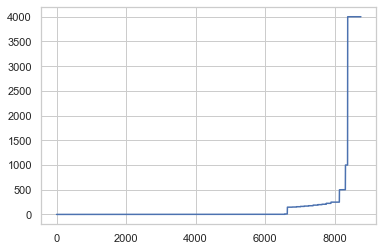

In [523]:
sorted_elec_prices = elec_prices_data["ElectricityPriceInEURperMWH"].copy()
#sorted_elec_prices.plot()
axs1 = sorted_elec_prices.sort_values(ignore_index=True).plot()
fig1 = axs1.get_figure()
fig1.savefig(path_to_plots + '/' + 'elec_prices.png', bbox_inches='tight', dpi=300)

In [524]:
elec_prices_data.head()

,AgentId,TimeStep,TotalAwardedPowerInMW,ElectricityPriceInEURperMWH,DispatchSystemCostInEUR
0,1,946080003,20809.791103,3.216406,54627.832107
1,1,946083603,20518.452690,3.216406,52874.223737
2,1,946087203,20055.936174,3.216406,50390.795337
3,1,946090803,19677.045552,3.216406,48056.847269
4,1,946094403,19770.006401,3.216406,47519.385626


In [525]:
electrolysers_results

,identifier,ElectrolyserType,PeakConsumptionInMW,ConversionFactor,HydrogenProductionTargetInMWH,VARIABLE_COSTS_IN_EURO,REVENUES_IN_EURO,CONSUMPTION_IN_MWH,PRODUCTION_IN_MWH,CONTRIBUTION_MARGIN_IN_EURO
0,99999999999,ELECTROLYSIS,41071,0.74,12901502,4.145730e+08,1.259364e+09,8.509219e+06,NaN,8.447914e+08


In [526]:
load_generation = pd.concat([generation_data, 
                      load_data],   axis=1 )
load_generation.drop(0, axis=1, inplace=True) # dropping timeseries
load_generation.rename(columns={1: "load" }, inplace=True)
# load_generation.sort_values(by=1, inplace=True) # sorting by increasing load
# load_generation.reset_index(inplace=True )
#load_generation.drop("index", axis=1, inplace=True)
load_generation.drop("electrolysis_hydrogen_generation", axis=1, inplace=True)
load_generation.head()

,res,conventionals,storages_discharging,storages_charging,storages_aggregated_level,load_shedding,electrolysis_power_consumption,load
0,20809.791103,0.0,0.0,0.0,0.0,0.0,410.0,16591.589856
1,20518.452690,0.0,0.0,0.0,0.0,0.0,410.0,16358.690025
2,20055.936174,0.0,0.0,0.0,0.0,0.0,410.0,15960.179757
3,19677.045552,0.0,0.0,0.0,0.0,0.0,410.0,15667.800126
4,19770.006401,0.0,0.0,0.0,0.0,0.0,410.0,15748.635647


In [527]:
load_generation["storages_charging"] = load_generation["storages_charging"]*-1
load_generation["electrolysis_power_consumption"] = load_generation["electrolysis_power_consumption"]*-1
load_generation.drop("storages_aggregated_level", axis=1, inplace=True)

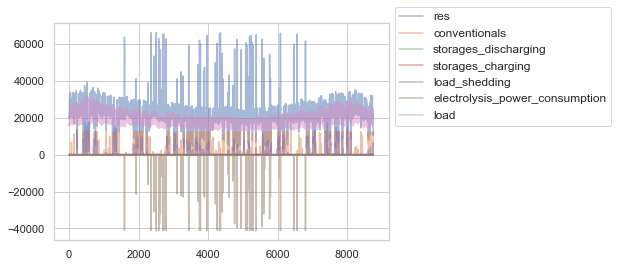

In [528]:
load_generation.plot(alpha=0.5)
axs1= plt.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1.1))
fig1 = axs1.get_figure()
fig1.savefig(path_to_plots + '/' + 'testing.png', bbox_inches='tight', dpi=300)

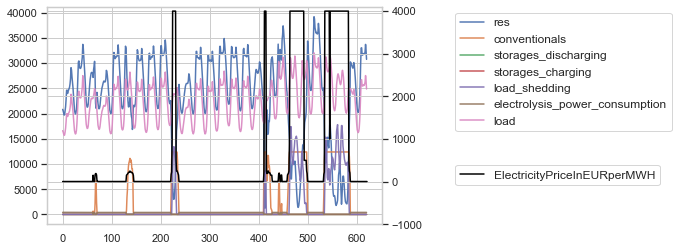

In [563]:
ElectricityPriceInEURperMWH = elec_prices_data["ElectricityPriceInEURperMWH" ]
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
load_generation["electrolysis_power_consumption"] = load_generation["electrolysis_power_consumption"]*-1
load_generation.iloc[0:620,0:7].plot( ax=ax1, alpha=0.95)
ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 1))
ax2.plot(ElectricityPriceInEURperMWH.loc[0:620] , color = "black")
ax2.set_ylim(-1000, 4100)
ax2.legend(['ElectricityPriceInEURperMWH'],fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 0.3))
fig1 = ax1.get_figure()
fig1.savefig(path_to_plots + '/' + 'timeseries.png', bbox_inches='tight', dpi=300)

In [530]:
# plt.stackplot( load_generation.index, load_generation.res, load_generation.conventionals, load_generation.load_shedding, load_generation.storages_discharging,
#               load_generation.storages_discharging,  labels=['RES', 'conventional', "load shedding", "dish", "charg"]  )


In [531]:
load_generation

,res,conventionals,storages_discharging,storages_charging,load_shedding,electrolysis_power_consumption,load
0,20809.791103,0.000000,0.000000,-0.0,0.000000,410.0,16591.589856
1,20518.452690,0.000000,0.000000,-0.0,0.000000,410.0,16358.690025
2,20055.936174,0.000000,0.000000,-0.0,0.000000,410.0,15960.179757
3,19677.045552,0.000000,0.000000,-0.0,0.000000,410.0,15667.800126
4,19770.006401,0.000000,0.000000,-0.0,0.000000,410.0,15748.635647
...,...,...,...,...,...,...,...
8755,11634.074000,12377.000000,0.195443,-0.0,3151.905623,0.0,22161.399480
8756,10956.061000,12377.000000,0.195443,-0.0,2310.966455,0.0,20804.876623
8757,10722.056000,12377.000000,0.000033,-0.0,1480.369055,0.0,19904.088428
8758,11482.071000,12198.238305,0.000025,-0.0,0.000000,0.0,19118.281243


In [532]:
# this only work when there is one battery!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# storages_bids_discharge = storages_raw["OfferedDischargePriceInEURperMWH"].dropna()
# storages_bids_discharge.reset_index(drop=True, inplace = True)
# storages_bids_charge = storages_raw["OfferedChargePriceInEURperMWH"].dropna()
# storages_bids_charge.reset_index(drop=True, inplace = True)
# storages_bids_charge.sort_values(ignore_index=True).plot()

# AwardedDischargePowerInMWH = storages_raw["AwardedDischargePowerInMWH"].dropna()
# AwardedDischargePowerInMWH.reset_index(drop=True, inplace = True)
# plt.scatter(x = ElectricityPriceInEURperMWH , y= AwardedDischargePowerInMWH )
# plt.legend()
# plt.xlabel("ElectricityPriceInEURperMWH")
# plt.ylabel("AwardedDischargePowerInMWH")
# plt.savefig(path_to_plots + '/' + 'DischargePowervsprices.png', bbox_inches='tight', dpi=300)


In [533]:
# this only work when there is one battery!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# x = storages_bids_discharge.values.reshape(-1,1)
# y = storages_bids_charge.values.reshape(-1,1)
# regr = LinearRegression()
# regr.fit(x, y)
# fig = plt.scatter(x, y,  color='black')
# plt.plot(x, regr.predict(x), color='blue', linewidth=3)
# plt.xticks(())
# plt.yticks(())
# plt.xlabel("ElectricityPriceInEURperMWH")
# plt.ylabel("OfferedDischargePriceInEURperMWH")
# plt.legend()
# plt.show()
# print("Coefficients: \n", regr.coef_)


In [534]:
# this only work when there is one battery!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# fig, ax1 = plt.subplots()
# ax2 = ax1.twinx()
# storages_bids_discharge.loc[8500:8760].plot( ax=ax1, color = "blue")
# ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 1))
# ax2.plot(ElectricityPriceInEURperMWH.loc[8500:8760] , color = "black")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


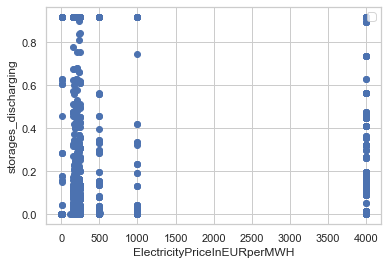

In [535]:
load_generation["storages_discharging"]
plt.scatter(x = ElectricityPriceInEURperMWH , y= load_generation["storages_discharging"] )
plt.legend()
plt.xlabel("ElectricityPriceInEURperMWH")
plt.ylabel("storages_discharging")
plt.savefig(path_to_plots + '/' + 'BatteriesProductionvsPricesTimeseries.png', bbox_inches='tight', dpi=300)

storages_charging      -0.340611
storages_discharging    0.281497


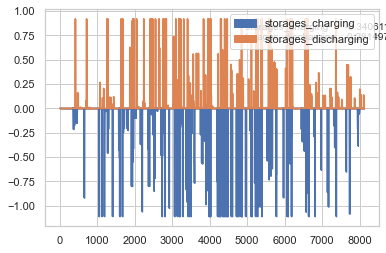

In [536]:
storages = load_generation[["storages_charging", "storages_discharging"]].copy()
sum_storages = storages.sum().divide(1000).to_string()
print(sum_storages)
ax1 = storages.iloc[0:8120,:].plot.area()
ax1.annotate(sum_storages,
               xy=(0.9, 0.8), xycoords='figure fraction',
               horizontalalignment='right', verticalalignment='top',
               fontsize='small')
fig1 = ax1.get_figure()
fig1.savefig(path_to_plots + '/' + 'storages_timeseries.png', bbox_inches='tight', dpi=300)

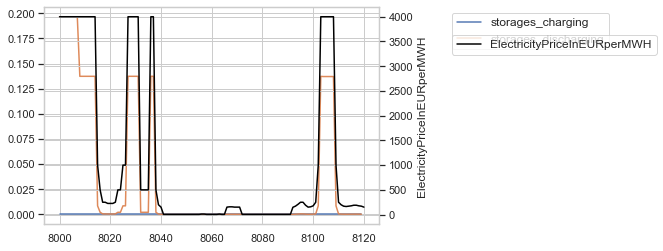

In [559]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
storages.iloc[8000:8120,:].plot( ax=ax1, alpha=0.95)
#load_generation.iloc[8000:8120,4].plot( ax=ax1, alpha=0.95)
ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 1))
ax2.plot(ElectricityPriceInEURperMWH.loc[8000:8120] , color = "black")
ax2.set_ylabel('ElectricityPriceInEURperMWH')
ax2.legend(['ElectricityPriceInEURperMWH'],fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 0.9))
fig1 = ax1.get_figure()
fig1.savefig(path_to_plots + '/' + 'storages_timeseries_short.png', bbox_inches='tight', dpi=300)

In [538]:
electrolysisPowerConsumptioninMWh  = load_generation["electrolysis_power_consumption"]

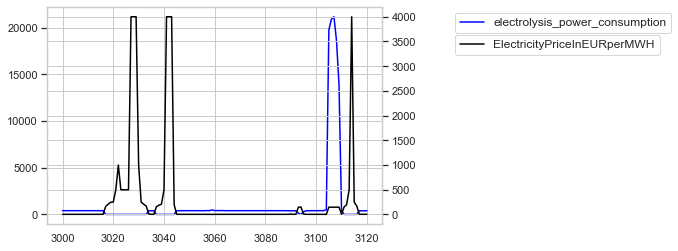

In [558]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
electrolysisPowerConsumptioninMWh = electrolysisPowerConsumptioninMWh*-1
electrolysisPowerConsumptioninMWh.loc[3000:3120].plot( ax=ax1, color = "blue")
ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 1))
ax2.plot(ElectricityPriceInEURperMWH.loc[3000:3120] , color = "black")
ax2.legend(['ElectricityPriceInEURperMWH'],fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 0.9))
plt.savefig(path_to_plots + '/' + 'H2vsPricesTimeseries.png', bbox_inches='tight', dpi=300)

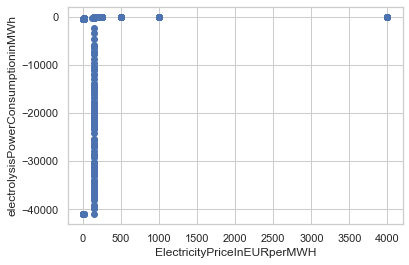

In [540]:
electricityPrice= ElectricityPriceInEURperMWH.values.reshape(-1,1)
electrolysisPower = electrolysisPowerConsumptioninMWh.values.reshape(-1,1)
fig = plt.scatter(electricityPrice, electrolysisPower)
plt.xlabel("ElectricityPriceInEURperMWH")
plt.ylabel("electrolysisPowerConsumptioninMWh")
plt.savefig(path_to_plots + '/' + 'H2vsPrices.png', bbox_inches='tight', dpi=300)

In [541]:
h2prices = pd.DataFrame(list(zip(ElectricityPriceInEURperMWH, electrolysisPowerConsumptioninMWh)),
              columns =['electricityPrice', 'electrolysisPower'])
h2prices.head()

,electricityPrice,electrolysisPower
0,3.216406,-410.0
1,3.216406,-410.0
2,3.216406,-410.0
3,3.216406,-410.0
4,3.216406,-410.0


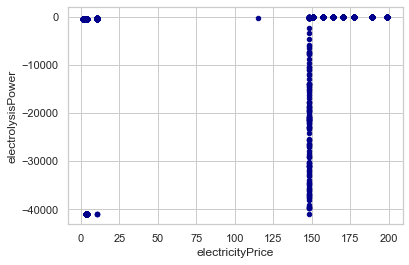

In [542]:
h2prices_filtered = h2prices[h2prices["electricityPrice"] < 200]
ax1 = h2prices_filtered.plot.scatter(x='electricityPrice',
                       y='electrolysisPower',
                       c='DarkBlue')
plt.savefig(path_to_plots + '/' + 'H2vsPricesZoom.png', bbox_inches='tight', dpi=300)

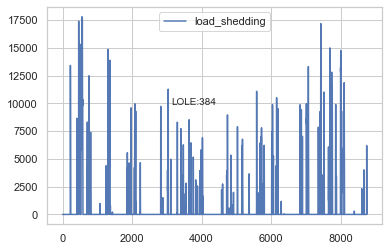

In [543]:
# LOLE
LOLE = len(h2prices[h2prices["electricityPrice"] == 4000].index)
ax1 = load_generation[["load_shedding"]].plot( alpha=0.95)
ax1.annotate("LOLE:" + str(LOLE),
               xy=(0.5, 0.5), xycoords='figure fraction',
               horizontalalignment='right', verticalalignment='bottom',
               fontsize='small')
fig1 = ax1.get_figure()
fig1.savefig(path_to_plots + '/' + 'load_shedding.png', bbox_inches='tight', dpi=300)

In [544]:
conventionals_join
#conventionals_join.loc[conventionals_join['FuelType'] =="HYDROGEN"]

,identifier,FuelType,OpexVarInEURperMWH,Efficiency,BlockSizeInMW,InstalledPowerInMW,VARIABLE_COSTS_IN_EURO,REVENUES_IN_EURO,CONSUMPTION_IN_MWH,PRODUCTION_IN_MWH,CONTRIBUTION_MARGIN_IN_EURO
0,99993300004,HYDROGEN,1.500000,0.400000,1,1,2.248889e+05,1.600217e+06,NaN,4.484325e+02,1.375328e+06
1,99990600006,BIOMASS,1.900000,0.309000,1,1,2.439788e+05,1.972011e+06,NaN,2.118449e+03,1.728032e+06
2,20501900040,NUCLEAR,4.162416,0.273770,484,484,1.081824e+07,9.547023e+08,NaN,1.046709e+06,9.438840e+08
3,20460800041,NATURAL_GAS,4.547998,0.562874,1000,1000,2.887746e+08,1.941481e+09,NaN,1.913362e+06,1.652706e+09
4,20420800042,NATURAL_GAS,4.732665,0.540695,1000,1000,2.824072e+08,1.923633e+09,NaN,1.797463e+06,1.641225e+09
5,20380800043,NATURAL_GAS,4.924830,0.519389,1000,1000,2.748951e+08,1.904903e+09,NaN,1.680727e+06,1.630008e+09
6,20340800044,NATURAL_GAS,5.124798,0.498923,1000,1000,2.668799e+08,1.885956e+09,NaN,1.567444e+06,1.619076e+09
7,20402200047,NATURAL_GAS,5.172634,0.373561,1300,1300,2.740266e+08,2.291845e+09,NaN,1.213952e+06,2.017818e+09
8,20302200046,NATURAL_GAS,5.713806,0.337842,1300,1300,2.597272e+08,2.250746e+09,NaN,1.040610e+06,1.991019e+09
9,20370900050,NATURAL_GAS,4.974079,0.446760,1309,1309,3.240364e+08,2.407701e+09,NaN,1.710901e+06,2.083665e+09


In [545]:
conventional_production = conventionals_join["PRODUCTION_IN_MWH"].sum()
conventional_production_from_generation = load_generation["conventionals"].sum()
a = conventional_production - conventional_production_from_generation

In [546]:
storages_data.head()

,identifier,StorageType,EnergyToPowerRatio,ChargingEfficiency,DischargingEfficiency,InitialEnergyLevelInMWH,InstalledPowerInMW
0,99992600008,STORAGE,5,0.9,0.92,0,1


In [547]:
conventional_production = conventionals_join["PRODUCTION_IN_MWH"].sum()
charging_from_generation = load_generation["storages_discharging"].sum()

In [548]:
#power consumed in MW
totalH2 = electrolysisPowerConsumptioninMWh.sum()
totalH2*0.74

-6296821.75357645

In [549]:
# Input = TWh monthly12901502.5
Input = 12901502.5*12/0.74
print(Input/totalH2)

-24.586694059120685


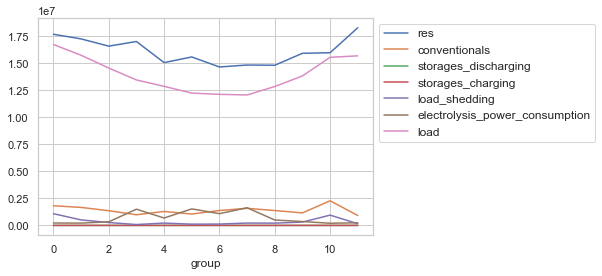

In [550]:
load_generation['group'] = (load_generation.index // 730)
grouped = load_generation.groupby(['group']).sum()
ax1 = grouped.plot()
ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1))
fig1 = ax1.get_figure()
fig1.savefig(path_to_plots + '/' + 'monthly_production.png', bbox_inches='tight', dpi=300)

In [551]:
grouped

,res,conventionals,storages_discharging,storages_charging,load_shedding,electrolysis_power_consumption,load
group,,,,,,,
0,1.768731e+07,1.819657e+06,13.145929,-15.931161,1.084516e+06,2.228698e+05,1.673892e+07
1,1.725723e+07,1.665652e+06,15.603043,-18.789819,5.105416e+05,2.137293e+05,1.574474e+07
2,1.658676e+07,1.361678e+06,24.877338,-30.415464,2.671603e+05,3.332553e+05,1.456015e+07
3,1.701730e+07,9.844851e+05,23.059441,-33.032439,8.142528e+04,1.501334e+06,1.346103e+07
4,1.506428e+07,1.291310e+06,33.075239,-37.885262,2.157306e+05,6.845241e+05,1.286805e+07
5,1.558713e+07,1.054288e+06,32.392143,-40.750448,1.154578e+05,1.529490e+06,1.224261e+07
6,1.466119e+07,1.377229e+06,33.084161,-34.834651,1.257073e+05,1.087607e+06,1.212731e+07
7,1.484059e+07,1.581779e+06,37.903951,-45.777717,2.170335e+05,1.635369e+06,1.206900e+07
8,1.482029e+07,1.376677e+06,19.326132,-27.038697,2.103521e+05,4.995326e+05,1.285159e+07
